In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
# Importing the data

raw_data_df = pd.read_csv('leads.csv')
raw_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 1. Data Cleaning, Preperation and Analysis

#### 1.1 Replacing 'Select' with NaN

As mentioned in the data dictionary, some of the columns have 'Select' which is default value in the drop down for the form. We can treat them as missing values

In [6]:
# Finding the columns that have 'Select'

for col in raw_data_df.columns:
    if 'Select' in raw_data_df[col].unique():
        print(col)

Specialization
How did you hear about X Education
Lead Profile
City


In [7]:
# Replacing 'Select' value with NaN

replace_col = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

for col in replace_col:
    raw_data_df[col] = raw_data_df[col].replace('Select', np.nan)

raw_data_df[replace_col].head()

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Business Administration,NaN,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,NaN,Mumbai
4,NaN,Other,NaN,Mumbai


#### 1.2 Missing Values

In [8]:
# Calculating missing value percentage and assigning it to varible to avoid repetition 

missing_values = round(raw_data_df.isna().sum() / len(raw_data_df) * 100, 2) 
missing_values

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

> * Let's check and handle the columns that have more than 50% data missing 

In [9]:
missing_values[missing_values >= 50]

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
dtype: float64

Analyzing 'How did you hear about X Education' column

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64


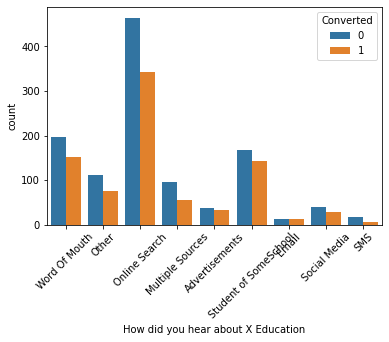

In [10]:
raw_data_df['How did you hear about X Education'].value_counts()

# Analyzing 'How did you hear about X Education' column

print('Analyzing \'How did you hear about X Education\' column\n')
print(raw_data_df['How did you hear about X Education'].value_counts())

sns.countplot(x='How did you hear about X Education', data=raw_data_df, hue='Converted')
plt.xlabel('How did you hear about X Education')
plt.xticks(rotation=45)
plt.show()

Analyzing 'Lead Profile' column

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


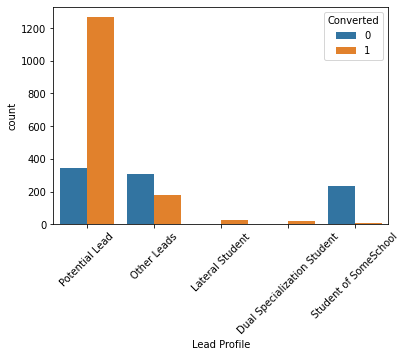

In [11]:
# Analyzing 'Lead Profile' column

print('Analyzing \'Lead Profile\' column\n')
print(raw_data_df['Lead Profile'].value_counts())

sns.countplot(x='Lead Profile', data=raw_data_df, hue='Converted')
plt.xlabel('Lead Profile')
plt.xticks(rotation=45)
plt.show()

Analyzing 'Lead Quality' column

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


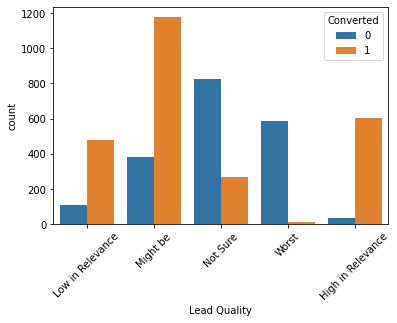

In [12]:
# Analyzing 'Lead Quality' column

print('Analyzing \'Lead Quality\' column\n')
print(raw_data_df['Lead Quality'].value_counts())

sns.countplot(x='Lead Quality', data=raw_data_df, hue='Converted')
plt.xlabel('Lead Quality')
plt.xticks(rotation=45)
plt.show()

> ##### Observations and decissions
> * Column `How did you hear about X Education` seems to have no exact effect on the target variable as the plot every label in the column have almost equal numbers for 0 and 1
> * For column `Lead Profile` only the label `Potential Lead` has some subtential amount of data and hence it shows the conversion the highest
> * As columns `How did you hear about X Education` & `Lead Profile` has almost all rows empty, imputing them will result in bias or false weightage to these columns during model building. So we can drop them without any doubt.
> * Column `Lead Quality` does have some more data compared to the other columns in this category, as well as it shows some sort of correlation for target varibale, but as this variable is defined on the intiution of human it may vary. Also the mode for the data is 'Might be' which will further increase the percentage of the label if imputed, hence creating a class imbalance. 
> * We decide to drop all 3 of these columns

> * Now. let's check on the columns with more than 15% and less than 50% data missing

In [13]:
missing_values[missing_values > 15][missing_values < 50].index

Index(['Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

Analyzing 'Country' column : 26.63

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia

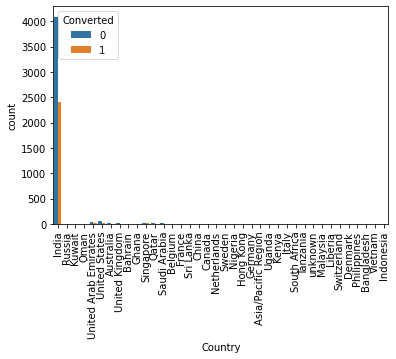

Analyzing 'Specialization' column : 36.58

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


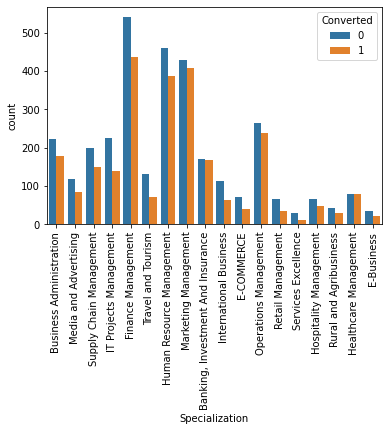

Analyzing 'What is your current occupation' column : 29.11

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


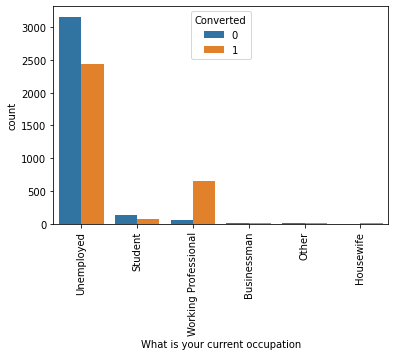

Analyzing 'What matters most to you in choosing a course' column : 29.32

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


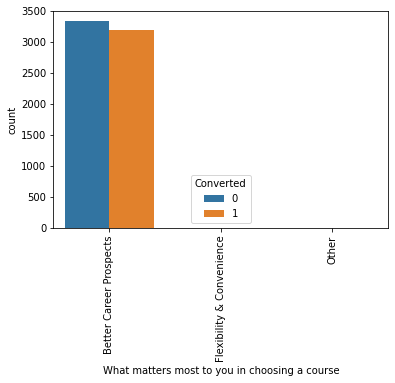

Analyzing 'Tags' column : 36.29

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                     

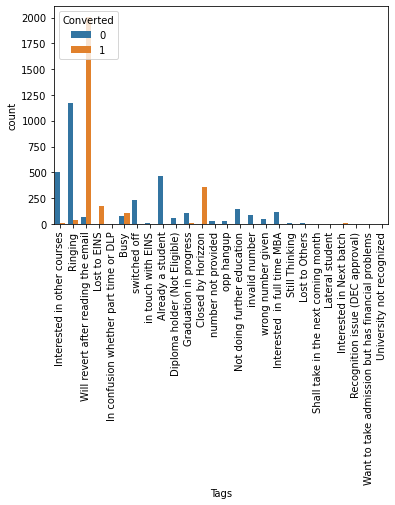

Analyzing 'City' column : 39.71

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


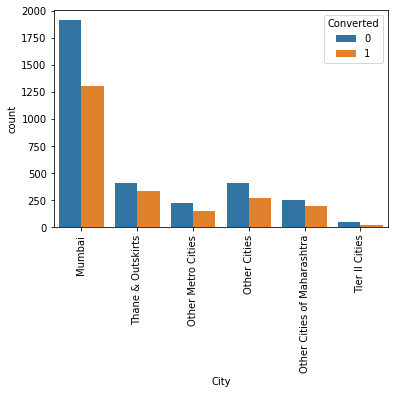

Analyzing 'Asymmetrique Activity Index' column : 45.65

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64


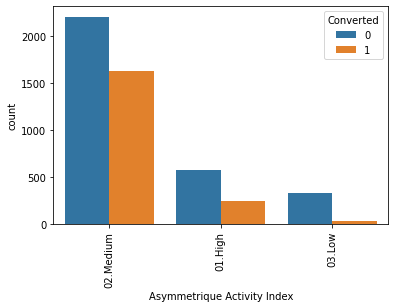

Analyzing 'Asymmetrique Profile Index' column : 45.65

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


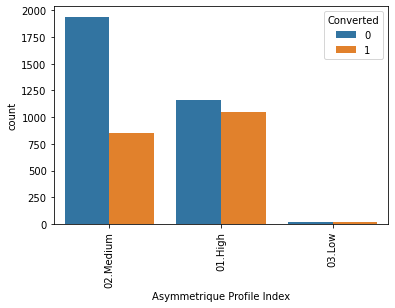

Analyzing 'Asymmetrique Activity Score' column : 45.65

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64


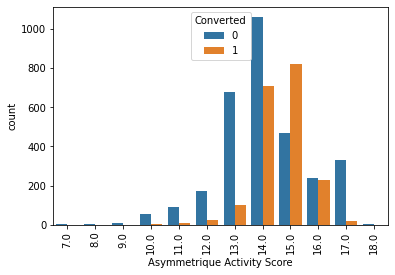

Analyzing 'Asymmetrique Profile Score' column : 45.65

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


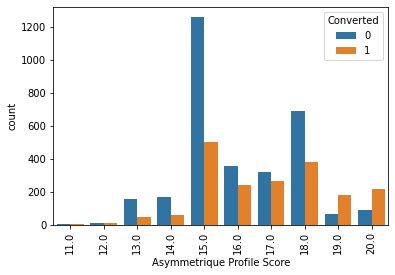

In [14]:
missing_col = ['Country', 'Specialization', 'What is your current occupation',
               'What matters most to you in choosing a course', 'Tags', 'City',
               'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
               'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

for col in missing_col:
    
    print(f'Analyzing \'{col}\' column : {missing_values[col]}\n')
    print(raw_data_df[col].value_counts())

    sns.countplot(x=col, data=raw_data_df, hue='Converted')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=90)
    plt.show()

> ##### Observations and decissions
> * Some columns like `Country` and `What is your current occupation` have huge data imbalance, as well as the column `What matters most to you in choosing a course` have all the same labels except three. We do see that the labels in `What is your current occupation` column have different conversion ratio, so we will keep this column and drop the other two
> * Columns like `Asymmetrique Activity Index`, `City` & `Specialization` though have good distribution of data, but the conversion ratio, that is the ratio of converted to non converted lead, in all the labels are more or less same. Indicating they don't have major impact on the target vairbale, hence can be dropped.
> * Though we are dropping the `Specialization` columns, there is one interesting fact to be noticed, that the specializations in the management domain have higher number of leads present
> * Following along these lines, we will be keeping `Tags`, `Asymmetrique Activity Score` & `Asymmetrique Profile Score`, from these set of columns. 

In [15]:
drop_cols = ['Lead Quality', 'Lead Profile', 'How did you hear about X Education', 'Country', 'Specialization', 
             'What matters most to you in choosing a course', 'City',
             'Asymmetrique Activity Index', 'Asymmetrique Profile Index']

# Dropping columns with missing values

imputed_data_df = raw_data_df.drop(drop_cols, axis=1)
imputed_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,15.0,18.0,No,No,Modified


In [16]:
# Imputing columns that were analyzed 

imputed_data_df['Tags'].fillna(imputed_data_df['Tags'].mode()[0], inplace=True)
imputed_data_df['What is your current occupation'].fillna(imputed_data_df['What is your current occupation'].mode()[0], inplace=True)
imputed_data_df['Asymmetrique Activity Score'].fillna(imputed_data_df['Asymmetrique Activity Score'].median(),
                                                      inplace=True)
imputed_data_df['Asymmetrique Profile Score'].fillna(imputed_data_df['Asymmetrique Profile Score'].median(),
                                                     inplace=True)



imputed_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,15.0,18.0,No,No,Modified


In [17]:
# Checking the missing value percentages

round(imputed_data_df.isna().sum() / len(imputed_data_df) * 100, 2) 

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

> * We see some of the values are missing in `TotalVisits`, this might indicate that the lead never visted the website and hence might be directly excluded from our data set
> * Column `Page Views Per Visit` have similar % of data missing which makes sense

> Let's explore these rows and check if we can just drop these rows 

In [18]:
# Printing the rows with only 'TotalVisits' missing

imputed_data_df[imputed_data_df['TotalVisits'].isna()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,15.0,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,Working Professional,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,16.0,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,15.0,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,Closed by Horizzon,No,No,14.0,20.0,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,Working Professional,No,No,No,No,No,No,No,No,Closed by Horizzon,No,No,14.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,587973,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,Interested in full time MBA,No,No,13.0,18.0,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,587916,Lead Add Form,Reference,No,No,1,NaN,903,NaN,NaN,Working Professional,No,No,No,No,No,No,No,No,Lost to EINS,No,No,14.0,19.0,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,NaN,Unemployed,No,No,No,No,No,No,No,No,Closed by Horizzon,No,No,14.0,17.0,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,NaN,Working Professional,No,No,No,No,No,No,No,No,Closed by Horizzon,No,No,14.0,20.0,No,No,Modified


> * As thought the missing data is same for both the columns, similarly most of the data has No as labels. 
> * Interestingly there is data for `Total Time Spent on Website`, while there is no visit, so they are most probably false data.
> * We will go ahead and drop these rows

In [19]:
# Dropping rows with missing 'TotalVisits'

imputed_data_df.drop(imputed_data_df[imputed_data_df['TotalVisits'].isna()].index, axis=0, inplace=True)
imputed_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,15.0,18.0,No,No,Modified


In [20]:
# Re-checking the missing value percentages

round(imputed_data_df.isna().sum() / len(imputed_data_df) * 100, 2) 

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [21]:
# Dropping rows with missing 'Lead Source'

imputed_data_df[imputed_data_df['Lead Source'].isna()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1569,1c87e9fd-c675-468e-9653-2cc968f077f2,643899,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,16.0,No,No,SMS Sent
1746,215e9984-818a-42ff-ba1c-667ce73199a5,642394,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,15.0,16.0,No,No,Modified
2020,06f5b430-a45a-4de2-9aca-e13ee0a43589,640115,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,15.0,16.0,No,No,SMS Sent
2025,e7524e35-923e-4c9f-800d-b18e1a6c5e3b,640081,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,15.0,16.0,No,No,SMS Sent
2152,e54f76cc-2436-451c-8a29-fcd32ed7bed4,639134,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,16.0,No,No,SMS Sent
2346,c309cc6d-204f-4ac0-a766-7d326bd01218,637125,Lead Add Form,NaN,Yes,No,1,0.0,0,0.0,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,16.0,No,No,SMS Sent
2544,175611de-436d-11e6-b61b-22000aa8e760,635028,Lead Import,NaN,No,No,0,0.0,0,0.0,Email Opened,Unemployed,No,No,No,No,No,No,No,No,number not provided,No,No,14.0,15.0,No,No,Email Opened
2676,bcfdd00e-99d2-4be1-b09b-a6260a63dade,633945,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,16.0,No,No,SMS Sent
3028,6238e5d6-2708-4d78-8180-82fd603c8a22,630801,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,16.0,No,No,SMS Sent
3266,1081fb9a-3309-46b6-a890-74de644e05c8,628685,Landing Page Submission,NaN,No,No,1,2.0,9,2.0,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,16.0,No,No,SMS Sent


> Similar to `TotalVisits`, we can see these are very hand full of row and if we check closely we will see a lot of columns have imputed data in them as well. So we will go ahead and drop these rows.

In [22]:
# Dropping rows with missing 'Lead Source'

imputed_data_df.drop(imputed_data_df[imputed_data_df['Lead Source'].isna()].index, axis=0, inplace=True)
imputed_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,15.0,18.0,No,No,Modified


In [23]:
# Re-checking the missing value percentages

round(imputed_data_df.isna().sum() / len(imputed_data_df) * 100, 2) 

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

#### 1.3 Selecting Features

> ##### Insignificatn Columns and assumptions
> * `Prodpect ID` and `Lead Number` are identifier columns so we can straight away drop them
> * `Lead Origin` is redundant with `Lead Source` and later is more precise on data so we will keep `Lead Source`
> * `Last Activity` & `Last Notable Activity` are redundant and we will keep the `Last Activity`

In [24]:
insignificant_col = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Last Notable Activity']

In [25]:
# checking the distribution of data for columns with yes/no values

for col in imputed_data_df.columns:
    if 'Yes' in imputed_data_df[col].values or 'No' in imputed_data_df[col].values:
        print(f'{imputed_data_df[col].value_counts(normalize=True) * 100} \n')

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64 

No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64 

No     99.845713
Yes     0.154287
Name: Search, dtype: float64 

No    100.0
Name: Magazine, dtype: float64 

No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64 

No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64 

No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64 

No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64 

No     99.922857
Yes     0.077143
Name: Through Recommendations, dtype: float64 

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64 

No    100.0
Name: Update me on Supply Chain Content, dtype: float64 

No    100.0
Name: Get updates on DM Content, dtype: float64 

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64 

No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype:

> ##### Observation
> * From the above analysis we can right away tell that there is a huge class imbalance in these columns, except `A free copy of Mastering The Interview`
> * Most of these columns have only one class present, so we can ignore these columns as well

In [26]:
for col in imputed_data_df.columns:
    if 'Yes' in imputed_data_df[col].values or 'No' in imputed_data_df[col].values:
        print(col)

Do Not Email
Do Not Call
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque
A free copy of Mastering The Interview


In [27]:
insignificant_col.extend([
    'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'
])
insignificant_col

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Last Notable Activity',
 'Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [28]:
final_data_df = imputed_data_df.drop(insignificant_col, axis=1)

final_data_df.columns

Index(['Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Tags',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [29]:
final_data_df.shape

(9074, 11)

#### 1.4 EDA and Redefining Feautres

In [30]:
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Source                             9074 non-null   object 
 1   Converted                               9074 non-null   int64  
 2   TotalVisits                             9074 non-null   float64
 3   Total Time Spent on Website             9074 non-null   int64  
 4   Page Views Per Visit                    9074 non-null   float64
 5   Last Activity                           9074 non-null   object 
 6   What is your current occupation         9074 non-null   object 
 7   Tags                                    9074 non-null   object 
 8   Asymmetrique Activity Score             9074 non-null   float64
 9   Asymmetrique Profile Score              9074 non-null   float64
 10  A free copy of Mastering The Interview  9074 non-null   obje

In [31]:
# Finding categorical columns
cat_cols = final_data_df.select_dtypes(include='object').columns.to_list()

# Finding numberical columns
num_cols = final_data_df.select_dtypes(exclude='object').columns.to_list()

###### 1.4.1 Categorical Varibale

In [32]:
len(cat_cols)

5

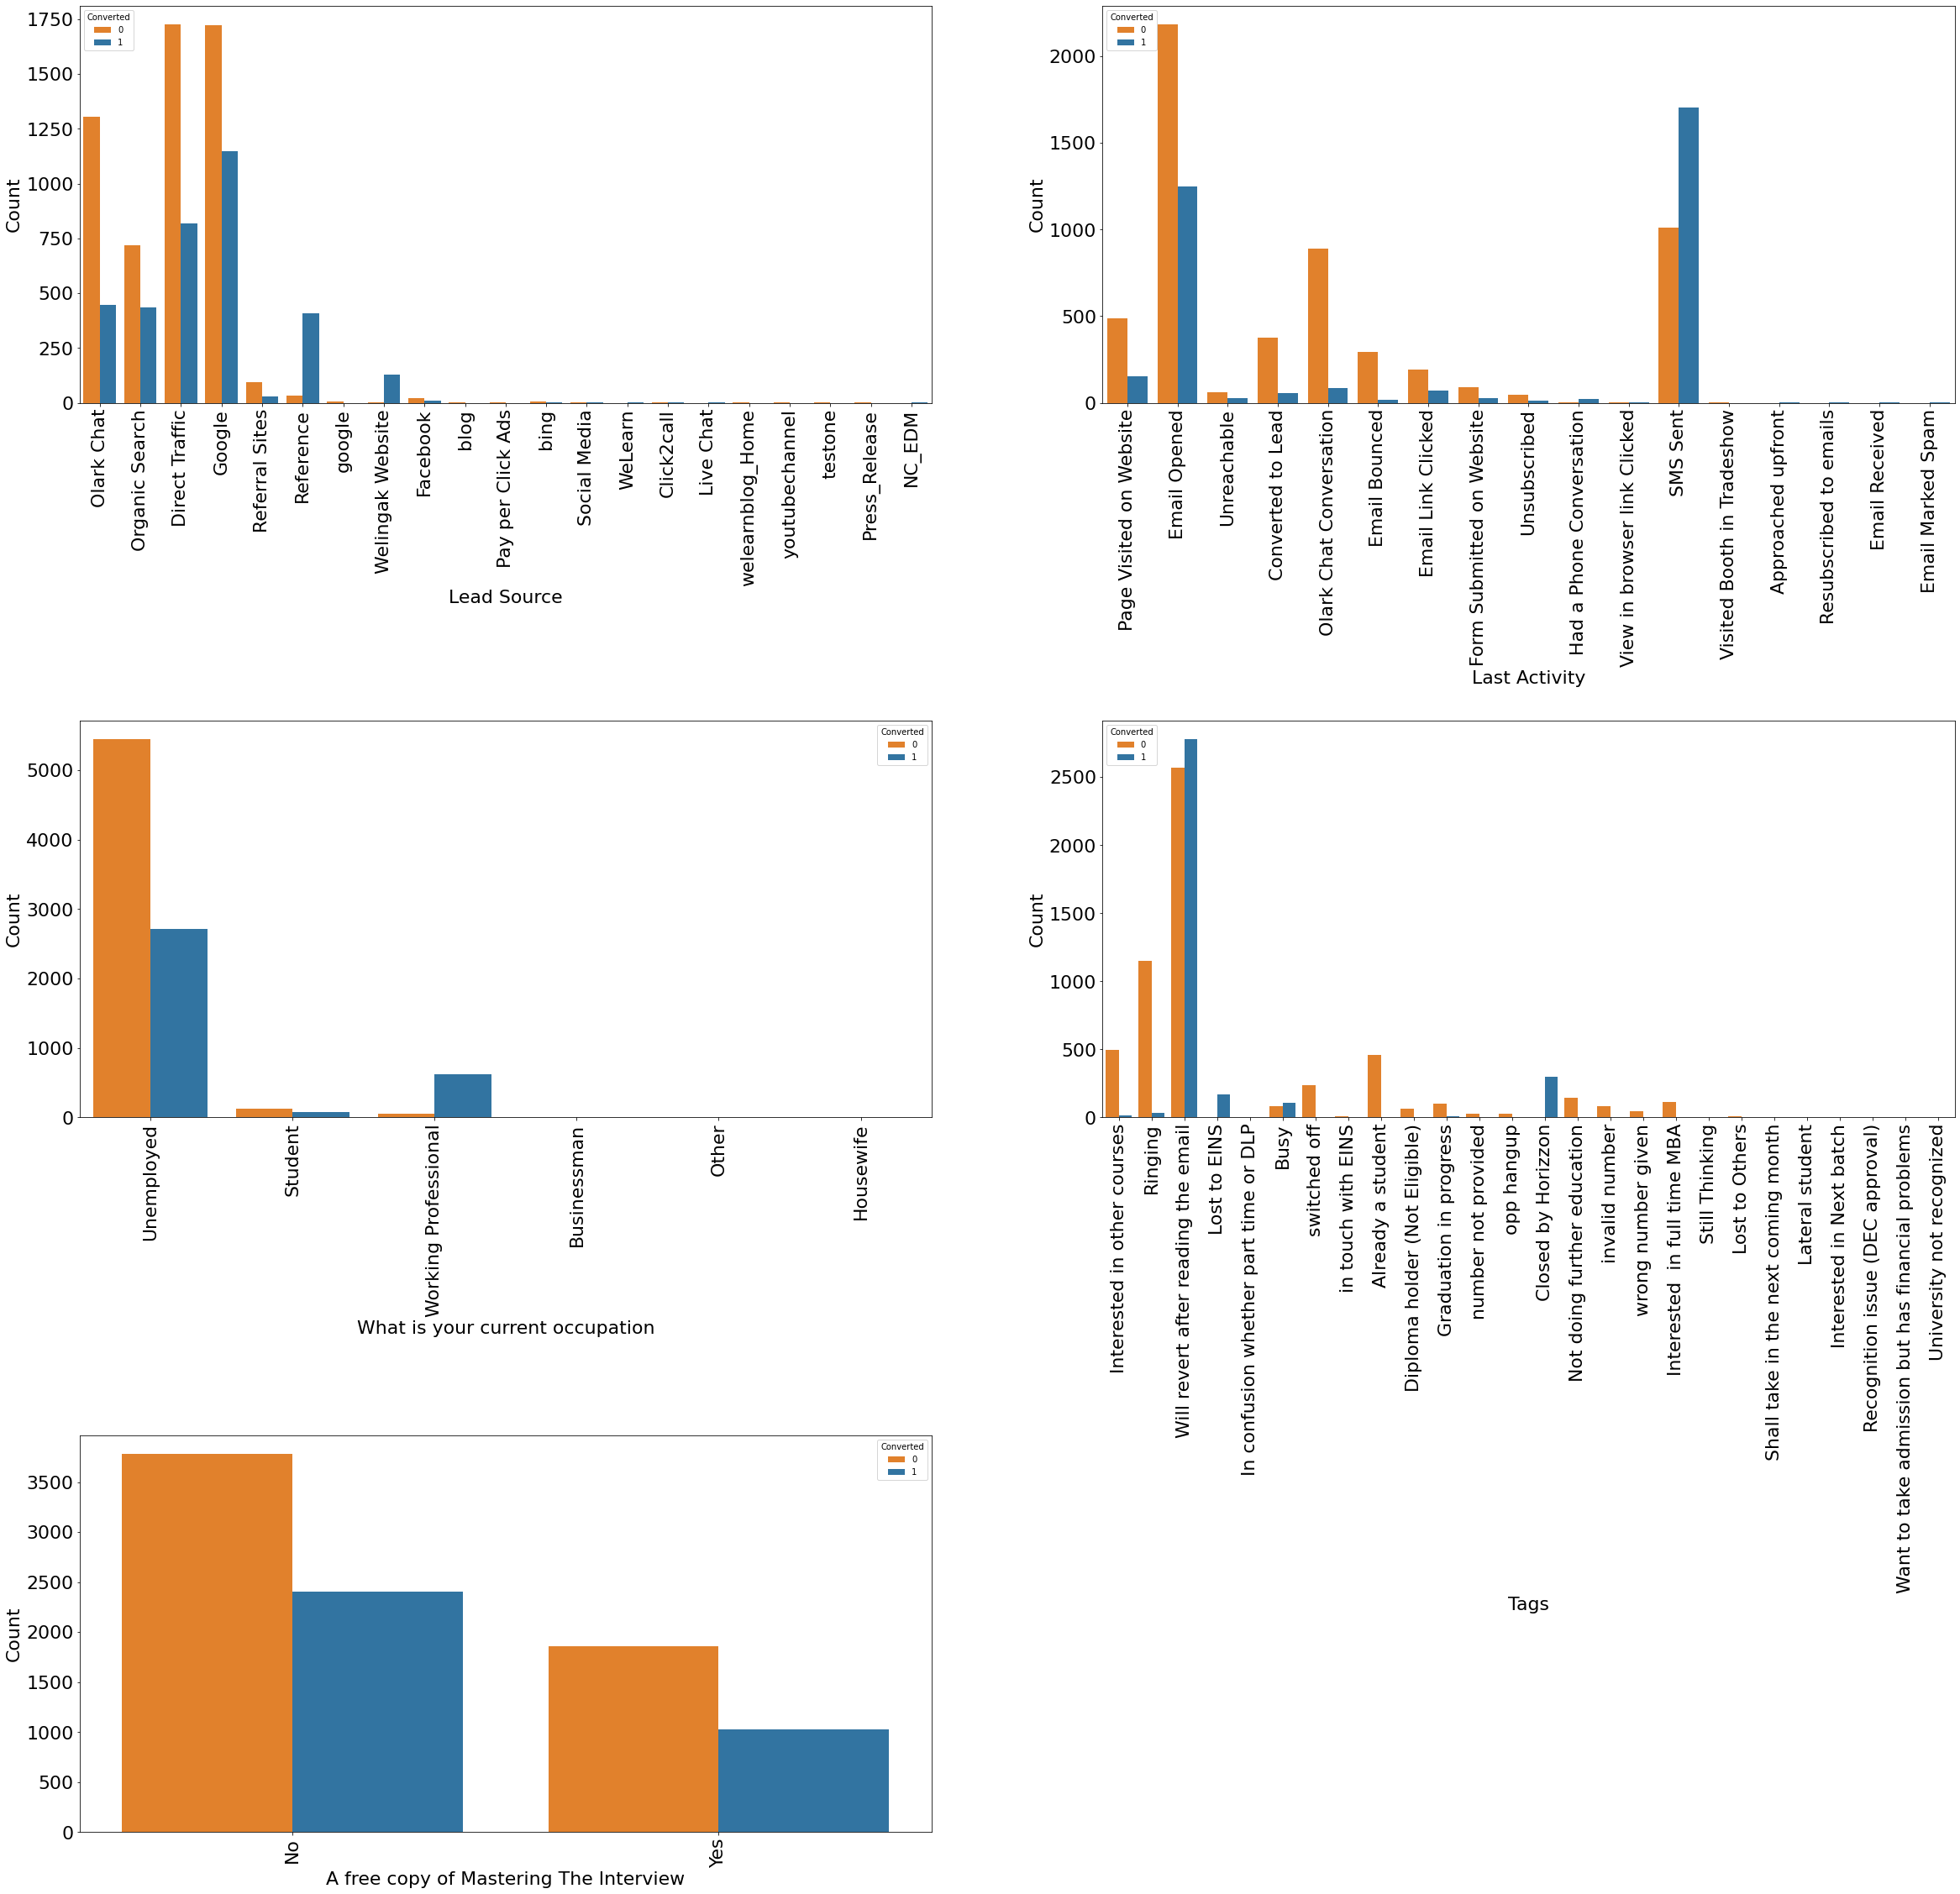

In [33]:
# palette = {0:'#D55E00', 1: '#0072B2' }

palette = {0:'C1', 1: 'C0' }

plt.figure(figsize=(40,40))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=final_data_df, hue='Converted', palette=palette)
    plt.xlabel(f'{col}', size=22)
    plt.ylabel('Count', size=22)
    plt.xticks(rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=22)

plt.subplots_adjust(hspace=0.8)   
plt.show()

> #### Observations
> * Students/Leads coming through Google are most likely to be converted into successful leads
> * Thought the most command last activity is opening email, the leads that sent SMS tend to convert more
> * Unemployed sectors generate the highest numbers of lead but the professional class turns out to be more successfull which reside with the fact that they can pay the fee easily
> * People who revert back on once the email is read tend to have high success rate for converting, which resides with the ideology that we usually intereact more when we are actually interested
> * Leads who didn't take a free copy of Mastering the interview appears to be more successful but we need to consider the fact that the ratio for yes:no and the conversion is almost same

###### 1.4.2 Continuous Varible

In [34]:
len(num_cols)

6

In [35]:
#Check the percentage of leads that have Converted :

Converted = round( final_data_df['Converted'].sum() / len(final_data_df['Converted']) * 100, 2 )
Converted

37.86

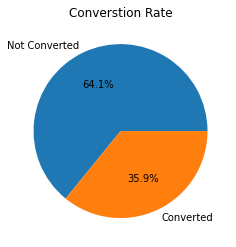

In [120]:
plt.pie(final_data_df['Converted'].value_counts( normalize=True ) * 100,
            labels=['Not Converted','Converted'], autopct='%1.1f%%')
plt.title('Converstion Rate')
plt.show()

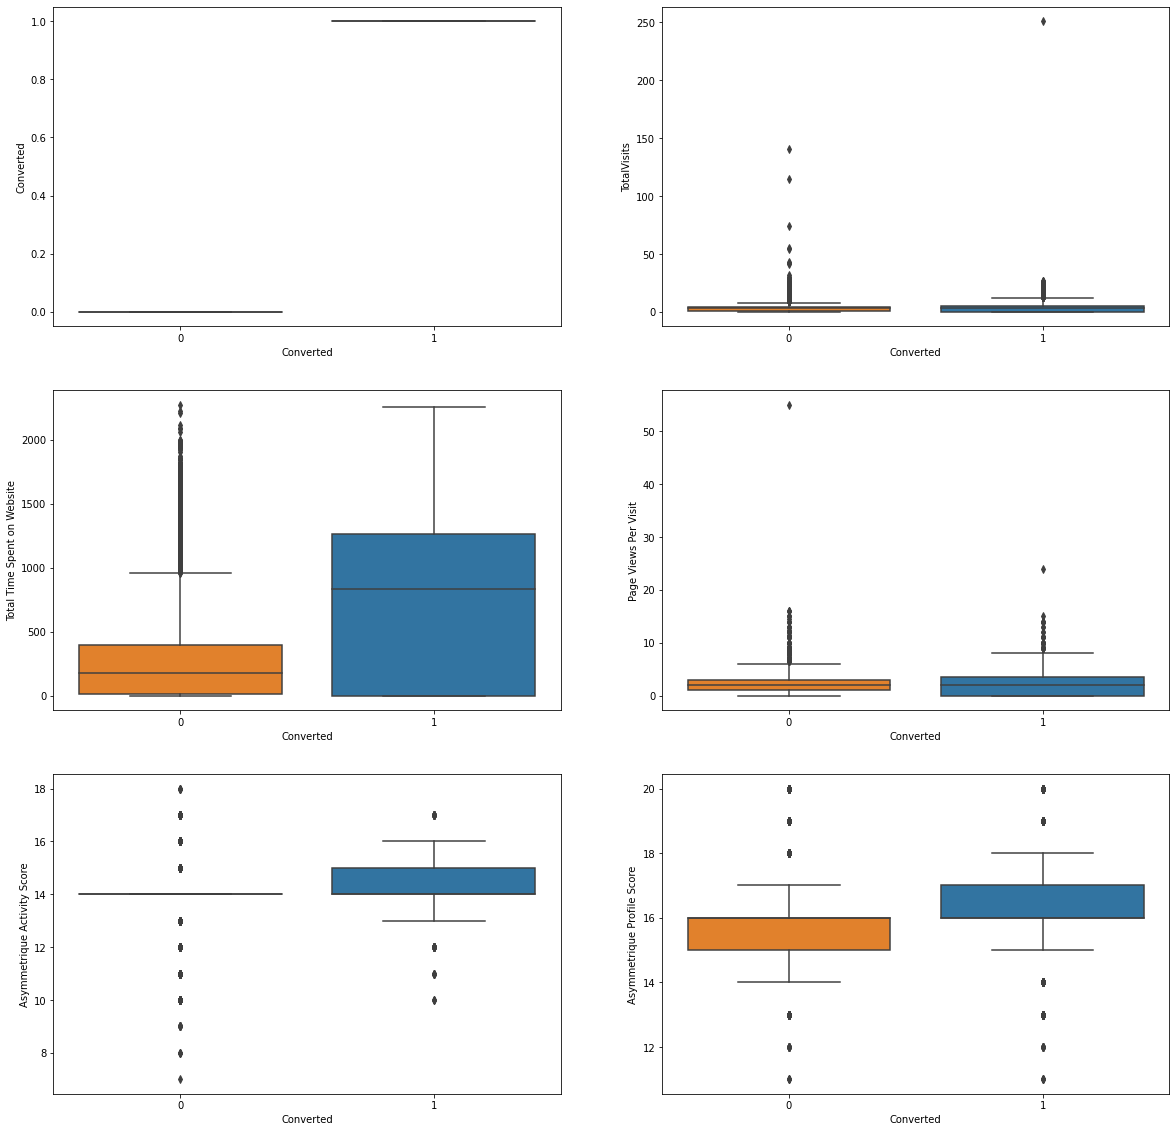

In [36]:
plt.figure(figsize=(20, 20))

palette = {0:'C1', 1: 'C0' }

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=final_data_df, y=col, x='Converted', palette=palette)

plt.show()

> #### Observations
> * The most prominent feature is the time spent on the website, we can easily see from the plot the the data size in the converted section is huge for this feature
> * We do see outliers in the features, we need to treat them before we go ahead with the model building step

In [37]:
# Look at the final data at this point

final_data_df.head()

,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Tags,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
0,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,Interested in other courses,15.0,15.0,No
1,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,Ringing,15.0,15.0,No
2,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Will revert after reading the email,14.0,20.0,Yes
3,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,Ringing,13.0,17.0,No
4,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,Will revert after reading the email,15.0,18.0,No


#### 1.4.3 Redifing some features

In [38]:
final_data_df.describe(percentiles=[.25, .5, .75, .90, .95, .99, 1])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151,14.170818,16.182940
std,0.485053,4.858802,545.256560,2.160871,1.040311,1.339706
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,11.000000,1.000000,14.000000,16.000000
50%,0.000000,3.000000,246.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,922.750000,3.200000,14.000000,16.000000
90%,1.000000,7.000000,1373.000000,5.000000,15.000000,18.000000
95%,1.000000,10.000000,1557.000000,6.000000,16.000000,19.000000
99%,1.000000,17.000000,1839.000000,9.000000,17.000000,20.000000


> #### Observations & Assumptions
> * From the graphs drawn above and the statistics we calculated now, we can see that the columns `TotalVisits`, `Total Time Spent on Website` & `Page Views Per Visit` have outliers towards the upper quantile of data
> * Columns `Asymmetrique Activity Score` & `Asymmetrique Profile Score` don't have outliers 
> * Since we don't have the means to check if those values are accurate or not we will go ahead and drop them

> TotalVisits
> * As the graph is squeezed, we will find the distribution by calculating the % of data for each value
> * We can see that after the value of 10 the contribution is negligible which corrosponds to 95 percentile, we will drop that

In [39]:
# Treating TotalVisits columns

round(final_data_df['TotalVisits'].value_counts(normalize=True), 2)

0.0      0.24
2.0      0.19
3.0      0.14
4.0      0.12
5.0      0.09
6.0      0.05
1.0      0.04
7.0      0.03
8.0      0.02
9.0      0.02
10.0     0.01
11.0     0.01
13.0     0.01
12.0     0.00
14.0     0.00
16.0     0.00
15.0     0.00
17.0     0.00
18.0     0.00
20.0     0.00
19.0     0.00
21.0     0.00
23.0     0.00
24.0     0.00
25.0     0.00
27.0     0.00
22.0     0.00
29.0     0.00
28.0     0.00
26.0     0.00
141.0    0.00
55.0     0.00
30.0     0.00
43.0     0.00
74.0     0.00
41.0     0.00
54.0     0.00
115.0    0.00
251.0    0.00
32.0     0.00
42.0     0.00
Name: TotalVisits, dtype: float64

In [40]:
final_data_df = final_data_df[final_data_df['TotalVisits'] <= final_data_df['TotalVisits'].quantile(0.95)]

In [41]:
final_data_df.shape

(8721, 11)

> Total Time Spent on Website
> * From graph we can see the outliers start from 1000 above the closet quantile is 95%, so we will drop everything above that

In [42]:
final_data_df = final_data_df[final_data_df['Total Time Spent on Website'] <= final_data_df['Total Time Spent on Website'].quantile(0.95)]

In [43]:
final_data_df.shape

(8287, 11)

> Page Views Per Visit
> * From the boxplot we can see that the value above to 10 are outliers, which is 99 quantile above so we will drop everything above that

In [44]:
final_data_df = final_data_df[final_data_df['Page Views Per Visit'] <= final_data_df['Page Views Per Visit'].quantile(0.99)]

In [45]:
final_data_df.shape

(8223, 11)

In [46]:
final_data_df.describe(percentiles=[.25, .5, .75, .90, .95, .99, 1])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000,8223.000000
mean,0.358750,2.811383,405.975921,2.156703,14.156755,16.162228
std,0.479663,2.416508,471.575711,1.829687,1.034138,1.317583
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,0.000000,0.000000,0.000000,14.000000,16.000000
50%,0.000000,3.000000,209.000000,2.000000,14.000000,16.000000
75%,1.000000,4.000000,717.500000,3.000000,14.000000,16.000000
90%,1.000000,6.000000,1231.800000,5.000000,15.000000,18.000000
95%,1.000000,7.000000,1372.000000,5.000000,16.000000,19.000000
99%,1.000000,9.000000,1507.000000,7.000000,17.000000,20.000000


In [47]:
# Updating 'A free copy of Mastering The Interview' to binary values

final_data_df['A free copy of Mastering The Interview'] = final_data_df['A free copy of Mastering The Interview']\
                                                            .map({'Yes' : 1, 'No' : 0})
# Removing this columns from list of categorical columns 

cat_cols.remove('A free copy of Mastering The Interview')

final_data_df['A free copy of Mastering The Interview'].value_counts()

0    5739
1    2484
Name: A free copy of Mastering The Interview, dtype: int64

In [48]:
# Creating dummy variables for categorical feautres

final_data_df = pd.get_dummies(data=final_data_df, columns=cat_cols, drop_first=True)
final_data_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,15.0,15.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,14.0,20.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,13.0,17.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,15.0,18.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [49]:
final_data_df.shape

(8223, 73)

## 2. Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y = final_data_df['Converted']

# Dropping 'Converted' and assigning rest to X

X = final_data_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,15.0,15.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,14.0,20.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,305,1.0,13.0,17.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,15.0,18.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=40)

## 3. Feature Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
num_cols.remove('Converted')

In [55]:
# Fitting scaler object on training data
norm = MinMaxScaler().fit(X_train[num_cols])

# Transforming the training data
X_train[num_cols] = norm.transform(X_train[num_cols])

# Transforming the testing dataabs
X_test[num_cols] = norm.transform(X_test[num_cols])

In [56]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
5756,0.5,0.119278,0.3125,0.7,0.555556,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
282,0.8,0.027724,1.0000,0.8,0.777778,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3329,0.6,0.753707,0.7500,0.7,0.555556,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7135,0.0,0.000000,0.0000,0.9,0.444444,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4397,0.6,0.557705,0.7500,0.7,0.555556,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## 4. Model Building

In [57]:
import statsmodels.api as sm

In [58]:
# Initial Model

log_model_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5688
Model Family:                Binomial   Df Model:                           67
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1527.6
Date:                Wed, 20 Oct 2021   Deviance:                       3055.3
Time:                        11:29:15   Pearson chi2:                 8.24e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5401
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     36.1952   1.59e+05      0.000      1.000   -3.12e+05    3.13e+05
TotalVisits                                                0.6148      0.331      1.860      0.063      -0.033       1.263
Total Time Spent on Website                                3.6020      0.182     19.786      0.000       3.245       3.959
Page Views Per Visit                                      -1.1183      0.361     -3.099      0.002      -1.825      -0.411
Asymmetrique Activity Score                                5.4756      0.567      9.652      0.000       4.364       6.588
Asymmetrique Profile Score                                 2.2398      0.374      5.990      0.000       1.507       2.973
A free copy of Mastering The Interview                    -0.1844      0.144     -1.277      0.202      -0.468       0.099
Lead Source_Direct Traffic                               -26.2180   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Facebook                                     -24.8066   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Google                                       -26.0636   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Live Chat                                     -1.5171   1.92e+05  -7.89e-06      1.000   -3.77e+05    3.77e+05
Lead Source_NC_EDM                                     -3.836e-09   3.59e-05     -0.000      1.000   -7.04e-05    7.04e-05
Lead Source_Olark Chat                                   -25.4325   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Organic Search                               -25.8941   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Pay per Click Ads                            -46.2205   2.46e+05     -0.000      1.000   -4.82e+05    4.82e+05
Lead Source_Press_Release                                -45.5388   2.46e+05     -0.000      1.000   -4.82e+05    4.82e+05
Lead Source_Reference                                    -23.1014   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Referral Sites                               -25.2754   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Social Media                                 -21.7235   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_WeLearn                                    -2.265e-09   2.17e-05     -0.000      1.000   -4.26e-05    4.26e-05
Lead Source_Welingak Website                             -20.9280   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_bing                                         -23.6522   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Sou

> #### Observation
> * Though this is our first model we can clearly see there are a lot of variables that have P value equal to 1 which is not at al good

### 4.1 Feature Selection using RFE

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE

rfe = RFE(log_reg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [61]:
rfe.support_

array([False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False])

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', True, 1),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_NC_EDM', False, 53),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_blog', False, 23),
 ('Lead Source_google', False, 8),
 ('Lead Source_testone', False, 50),
 ('Lead Source_welearnblog_Home', False,

In [63]:
# Listing the columns that were selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS'],
      dtype='object')

### 4.2 Creating models using RFE selected columns

In [64]:
# Second model

X_train_sm = sm.add_constant(X_train[rfe_col])
log_model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5735
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1603.4
Date:                Wed, 20 Oct 2021   Deviance:                       3206.8
Time:                        11:29:19   Pearson chi2:                 7.58e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5279
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -9.2611      0.592    -15.653      0.000     -10.421      -8.102
Total Time Spent on Website                              3.3263      0.165     20.133      0.000       3.002       3.650
Page Views Per Visit                                    -1.2752      0.230     -5.551      0.000      -1.725      -0.825
Asymmetrique Activity Score                              5.6048      0.531     10.553      0.000       4.564       6.646
Asymmetrique Profile Score                               1.8279      0.343      5.334      0.000       1.156       2.499
Lead Source_Reference                                    2.7576      0.314      8.781      0.000       2.142       3.373
Lead Source_Welingak Website                             4.8109      1.018      4.727      0.000       2.816       6.806
Last Activity_Email Bounced                             -2.5452      0.432     -5.895      0.000      -3.391      -1.699
Last Activity_Had a Phone Conversation                   1.6972      0.840      2.020      0.043       0.050       3.344
Last Activity_Olark Chat Conversation                   -2.0301      0.214     -9.473      0.000      -2.450      -1.610
Last Activity_SMS Sent                                   1.9158      0.101     18.914      0.000       1.717       2.114
Last Activity_Unreachable                                0.7651      0.424      1.806      0.071      -0.065       1.595
What is your current occupation_Unemployed              -1.3028      0.316     -4.125      0.000      -1.922      -0.684
What is your current occupation_Working Professional     1.5405      0.405      3.807      0.000       0.747       2.334
Tags_Busy                                                3.8621      0.299     12.899      0.000       3.275       4.449
Tags_Closed by Horizzon                                  8.3294      0.770     10.817      0.000       6.820       9.839
Tags_Graduation in progress                              2.6867      0.598      4.494      0.000       1.515       3.858
Tags_Lateral student                                    23.5627   1.25e+04      0.002      0.998   -2.44e+04    2.44e+04
Tags_Lost to EINS                                        9.6844      1.065      9.093      0.000       7.597      11.772
Tags_Will revert after reading the email                 4.0953      0.184     22.205      0.000       3.734       4.457
Tags_in touch with EINS                                  4.8043      1.055      4.555      0.000       2.737       6.871
========================================================================================================================
"""

> #### Observation
> * p value for 'Tags_Lateral student' is very high, will drop and rebuild the model

In [65]:
# Dropping the 'Tags_Lateral student' columns

rfe_col = rfe_col.drop('Tags_Lateral student')

# Third model

X_train_sm = sm.add_constant(X_train[rfe_col])
log_model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5736
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1609.5
Date:                Wed, 20 Oct 2021   Deviance:                       3218.9
Time:                        11:29:19   Pearson chi2:                 7.44e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5269
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -9.2113      0.589    -15.639      0.000     -10.366      -8.057
Total Time Spent on Website                              3.3201      0.165     20.143      0.000       2.997       3.643
Page Views Per Visit                                    -1.2856      0.229     -5.602      0.000      -1.735      -0.836
Asymmetrique Activity Score                              5.6173      0.530     10.590      0.000       4.578       6.657
Asymmetrique Profile Score                               1.8125      0.342      5.304      0.000       1.143       2.482
Lead Source_Reference                                    2.7372      0.312      8.777      0.000       2.126       3.348
Lead Source_Welingak Website                             4.8055      1.018      4.721      0.000       2.811       6.800
Last Activity_Email Bounced                             -2.5436      0.432     -5.894      0.000      -3.389      -1.698
Last Activity_Had a Phone Conversation                   1.7017      0.839      2.028      0.043       0.057       3.346
Last Activity_Olark Chat Conversation                   -2.0350      0.214     -9.498      0.000      -2.455      -1.615
Last Activity_SMS Sent                                   1.9226      0.101     19.004      0.000       1.724       2.121
Last Activity_Unreachable                                0.7667      0.423      1.813      0.070      -0.062       1.596
What is your current occupation_Unemployed              -1.2937      0.314     -4.118      0.000      -1.909      -0.678
What is your current occupation_Working Professional     1.5417      0.403      3.829      0.000       0.752       2.331
Tags_Busy                                                3.8051      0.297     12.804      0.000       3.223       4.388
Tags_Closed by Horizzon                                  8.2772      0.769     10.763      0.000       6.770       9.784
Tags_Graduation in progress                              2.6346      0.597      4.416      0.000       1.465       3.804
Tags_Lost to EINS                                        9.6281      1.064      9.047      0.000       7.542      11.714
Tags_Will revert after reading the email                 4.0393      0.181     22.344      0.000       3.685       4.394
Tags_in touch with EINS                                  4.7492      1.055      4.500      0.000       2.681       6.818
========================================================================================================================
"""

> #### Observation
> * Since the p value of `Last Activity_Unreachable` is 0.070 we will go ahead and drop the column and rebuild our model

In [66]:
# Dropping the 'Last Activity_Unreachable' columns

rfe_col = rfe_col.drop('Last Activity_Unreachable')

# Fourth model

X_train_sm = sm.add_constant(X_train[rfe_col])
log_model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5737
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1611.1
Date:                Wed, 20 Oct 2021   Deviance:                       3222.1
Time:                        11:29:19   Pearson chi2:                 7.41e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5266
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -9.1935      0.589    -15.602      0.000     -10.348      -8.039
Total Time Spent on Website                              3.3181      0.165     20.142      0.000       2.995       3.641
Page Views Per Visit                                    -1.2824      0.229     -5.597      0.000      -1.731      -0.833
Asymmetrique Activity Score                              5.5810      0.530     10.531      0.000       4.542       6.620
Asymmetrique Profile Score                               1.8297      0.342      5.350      0.000       1.159       2.500
Lead Source_Reference                                    2.7374      0.312      8.788      0.000       2.127       3.348
Lead Source_Welingak Website                             4.7957      1.018      4.712      0.000       2.801       6.790
Last Activity_Email Bounced                             -2.5559      0.431     -5.925      0.000      -3.401      -1.710
Last Activity_Had a Phone Conversation                   1.6825      0.839      2.006      0.045       0.039       3.326
Last Activity_Olark Chat Conversation                   -2.0421      0.214     -9.539      0.000      -2.462      -1.623
Last Activity_SMS Sent                                   1.9061      0.101     18.942      0.000       1.709       2.103
What is your current occupation_Unemployed              -1.2823      0.314     -4.082      0.000      -1.898      -0.667
What is your current occupation_Working Professional     1.5522      0.402      3.858      0.000       0.764       2.341
Tags_Busy                                                3.8251      0.298     12.850      0.000       3.242       4.408
Tags_Closed by Horizzon                                  8.2685      0.769     10.751      0.000       6.761       9.776
Tags_Graduation in progress                              2.6254      0.595      4.409      0.000       1.458       3.792
Tags_Lost to EINS                                        9.6397      1.064      9.063      0.000       7.555      11.724
Tags_Will revert after reading the email                 4.0411      0.181     22.351      0.000       3.687       4.395
Tags_in touch with EINS                                  4.7352      1.052      4.500      0.000       2.673       6.797
========================================================================================================================
"""

> #### Observation
> * Since the p value of `Last Activity_Had a Phone Conversation` is 0.045 we will go ahead and drop the column and rebuild our model

In [67]:
# Dropping the 'Last Activity_Had a Phone Conversation' columns

rfe_col = rfe_col.drop('Last Activity_Had a Phone Conversation')

# Fifth model

X_train_sm = sm.add_constant(X_train[rfe_col])
log_model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model_5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5738
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1613.4
Date:                Wed, 20 Oct 2021   Deviance:                       3226.7
Time:                        11:29:19   Pearson chi2:                 7.44e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5262
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -9.2355      0.589    -15.667      0.000     -10.391      -8.080
Total Time Spent on Website                              3.3132      0.164     20.154      0.000       2.991       3.635
Page Views Per Visit                                    -1.2667      0.229     -5.540      0.000      -1.715      -0.819
Asymmetrique Activity Score                              5.5921      0.530     10.553      0.000       4.554       6.631
Asymmetrique Profile Score                               1.8813      0.341      5.513      0.000       1.213       2.550
Lead Source_Reference                                    2.7323      0.312      8.764      0.000       2.121       3.343
Lead Source_Welingak Website                             4.7938      1.018      4.711      0.000       2.799       6.788
Last Activity_Email Bounced                             -2.5627      0.431     -5.942      0.000      -3.408      -1.717
Last Activity_Olark Chat Conversation                   -2.0473      0.214     -9.565      0.000      -2.467      -1.628
Last Activity_SMS Sent                                   1.8968      0.100     18.878      0.000       1.700       2.094
What is your current occupation_Unemployed              -1.2747      0.314     -4.058      0.000      -1.890      -0.659
What is your current occupation_Working Professional     1.5590      0.402      3.876      0.000       0.771       2.347
Tags_Busy                                                3.8233      0.298     12.850      0.000       3.240       4.406
Tags_Closed by Horizzon                                  8.3007      0.768     10.802      0.000       6.795       9.807
Tags_Graduation in progress                              2.6211      0.595      4.405      0.000       1.455       3.787
Tags_Lost to EINS                                        9.6399      1.064      9.058      0.000       7.554      11.726
Tags_Will revert after reading the email                 4.0452      0.181     22.378      0.000       3.691       4.399
Tags_in touch with EINS                                  4.7337      1.051      4.505      0.000       2.674       6.793
========================================================================================================================
"""

> #### Observation
> * As p values for rest of the columns are 0 we will check of VIF to see if there is any correlation between the variables
> * Before that we will calculate the accuracy of this model to have a base line 

In [68]:
# Function to get predicted and actual value for training data as a dataframe

def get_pred_df(y_train, y_train_pred, thershold):
    y_train_pred = y_train_pred.values.reshape(-1)
    df = pd.DataFrame({'LeadID': y_train.index, 'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
    df['Converted_Pred'] = df['Conversion_Prob'].map(lambda x: 1 if x > thershold else 0)
    return df

In [69]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = get_pred_df(y_train, y_train_pred, 0.5)
y_train_pred_final.head()

,LeadID,Converted,Conversion_Prob,Converted_Pred
0,5756,0,0.003868,0
1,282,0,0.000411,0
2,3329,1,0.874205,1
3,7135,0,0.355259,0
4,4397,1,0.352610,0


In [70]:
# Creating confusion metrix 

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred'] )
print(confusion)

[[3362  318]
 [ 357 1719]]


In [71]:
# Calculating accuracy

print( round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred']), 2) )

0.88


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# Create a Function to get the column names and VIF corrosponding to them

def calc_VIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[rfe_col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [74]:
# Calculate VIF 

vif = calc_VIF(rfe_col)
vif

,Features,VIF
2,Asymmetrique Activity Score,27.89
9,What is your current occupation_Unemployed,22.91
3,Asymmetrique Profile Score,15.54
1,Page Views Per Visit,3.28
15,Tags_Will revert after reading the email,3.13
10,What is your current occupation_Working Profes...,2.97
0,Total Time Spent on Website,2.19
8,Last Activity_SMS Sent,1.64
4,Lead Source_Reference,1.47
7,Last Activity_Olark Chat Conversation,1.41


In [75]:
# Dropping 'Asymmetrique Activity Score' due to high VIF

rfe_col = rfe_col.drop('Asymmetrique Activity Score')

# Sixth model

X_train_sm = sm.add_constant(X_train[rfe_col])
log_model_6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model_6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5739
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1674.3
Date:                Wed, 20 Oct 2021   Deviance:                       3348.5
Time:                        11:29:19   Pearson chi2:                 7.00e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5161
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8725      0.401    -12.149      0.000      -5.659      -4.086
Total Time Spent on Website                              3.2324      0.160     20.147      0.000       2.918       3.547
Page Views Per Visit                                    -1.5830      0.223     -7.093      0.000      -2.020      -1.146
Asymmetrique Profile Score                               1.5137      0.322      4.707      0.000       0.883       2.144
Lead Source_Reference                                    2.6223      0.307      8.533      0.000       2.020       3.225
Lead Source_Welingak Website                             4.6548      1.016      4.579      0.000       2.663       6.647
Last Activity_Email Bounced                             -2.5972      0.432     -6.016      0.000      -3.443      -1.751
Last Activity_Olark Chat Conversation                   -1.4944      0.201     -7.418      0.000      -1.889      -1.100
Last Activity_SMS Sent                                   1.8000      0.097     18.501      0.000       1.609       1.991
What is your current occupation_Unemployed              -1.3302      0.317     -4.193      0.000      -1.952      -0.708
What is your current occupation_Working Professional     1.4657      0.399      3.678      0.000       0.685       2.247
Tags_Busy                                                3.8577      0.292     13.195      0.000       3.285       4.431
Tags_Closed by Horizzon                                  8.3525      0.758     11.023      0.000       6.867       9.838
Tags_Graduation in progress                              2.0281      0.516      3.934      0.000       1.018       3.039
Tags_Lost to EINS                                        9.4750      1.057      8.961      0.000       7.403      11.547
Tags_Will revert after reading the email                 4.1236      0.180     22.925      0.000       3.771       4.476
Tags_in touch with EINS                                  3.8956      0.870      4.476      0.000       2.190       5.602
========================================================================================================================
"""

In [76]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = get_pred_df(y_train, y_train_pred, 0.5)


# Calculating accuracy

print( round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred']), 2) )

0.88


In [77]:
# Rechecking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Asymmetrique Profile Score,13.29
8,What is your current occupation_Unemployed,12.89
1,Page Views Per Visit,3.28
14,Tags_Will revert after reading the email,3.00
9,What is your current occupation_Working Profes...,2.24
0,Total Time Spent on Website,2.19
7,Last Activity_SMS Sent,1.64
3,Lead Source_Reference,1.47
6,Last Activity_Olark Chat Conversation,1.30
11,Tags_Closed by Horizzon,1.28


In [78]:
# Dropping 'Asymmetrique Profile Score' due to high VIF

rfe_col = rfe_col.drop('Asymmetrique Profile Score')

# Seventh model

X_train_sm = sm.add_constant(X_train[rfe_col])
log_model_7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model_7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5740
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1685.6
Date:                Wed, 20 Oct 2021   Deviance:                       3371.2
Time:                        11:29:19   Pearson chi2:                 6.87e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5142
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0402      0.357    -11.305      0.000      -4.741      -3.340
Total Time Spent on Website                              3.2676      0.160     20.445      0.000       2.954       3.581
Page Views Per Visit                                    -1.3770      0.217     -6.349      0.000      -1.802      -0.952
Lead Source_Reference                                    2.8352      0.301      9.417      0.000       2.245       3.425
Lead Source_Welingak Website                             4.6495      1.016      4.575      0.000       2.657       6.641
Last Activity_Email Bounced                             -2.5994      0.433     -6.006      0.000      -3.448      -1.751
Last Activity_Olark Chat Conversation                   -1.5553      0.201     -7.745      0.000      -1.949      -1.162
Last Activity_SMS Sent                                   1.7855      0.097     18.449      0.000       1.596       1.975
What is your current occupation_Unemployed              -1.3388      0.317     -4.221      0.000      -1.961      -0.717
What is your current occupation_Working Professional     1.4818      0.398      3.720      0.000       0.701       2.262
Tags_Busy                                                3.8317      0.292     13.142      0.000       3.260       4.403
Tags_Closed by Horizzon                                  8.3975      0.757     11.098      0.000       6.914       9.881
Tags_Graduation in progress                              2.0972      0.516      4.061      0.000       1.085       3.109
Tags_Lost to EINS                                        9.4812      1.053      9.004      0.000       7.417      11.545
Tags_Will revert after reading the email                 4.0948      0.180     22.750      0.000       3.742       4.448
Tags_in touch with EINS                                  3.7856      0.881      4.297      0.000       2.059       5.512
========================================================================================================================
"""

In [79]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = get_pred_df(y_train, y_train_pred, 0.5)


# Calculating accuracy

print( round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred']), 2) )

0.88


In [80]:
# Rechecking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,5.27
1,Page Views Per Visit,3.10
13,Tags_Will revert after reading the email,2.99
0,Total Time Spent on Website,2.16
6,Last Activity_SMS Sent,1.64
8,What is your current occupation_Working Profes...,1.63
2,Lead Source_Reference,1.40
5,Last Activity_Olark Chat Conversation,1.30
10,Tags_Closed by Horizzon,1.28
3,Lead Source_Welingak Website,1.08


In [81]:
# Dropping 'What is your current occupation_Unemployed' due to high VIF

rfe_col = rfe_col.drop('What is your current occupation_Unemployed')

# Eighth model

X_train_sm = sm.add_constant(X_train[rfe_col])
log_model_8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model_8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5756
Model:                            GLM   Df Residuals:                     5741
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1695.0
Date:                Wed, 20 Oct 2021   Deviance:                       3389.9
Time:                        11:29:20   Pearson chi2:                 6.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5126
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3398      0.200    -26.747      0.000      -5.731      -4.949
Total Time Spent on Website                              3.2972      0.160     20.659      0.000       2.984       3.610
Page Views Per Visit                                    -1.3743      0.216     -6.356      0.000      -1.798      -0.951
Lead Source_Reference                                    2.9086      0.297      9.803      0.000       2.327       3.490
Lead Source_Welingak Website                             4.6351      1.016      4.562      0.000       2.644       6.627
Last Activity_Email Bounced                             -2.4890      0.425     -5.851      0.000      -3.323      -1.655
Last Activity_Olark Chat Conversation                   -1.5821      0.201     -7.883      0.000      -1.975      -1.189
Last Activity_SMS Sent                                   1.7631      0.096     18.309      0.000       1.574       1.952
What is your current occupation_Working Professional     2.7838      0.252     11.027      0.000       2.289       3.279
Tags_Busy                                                3.8098      0.291     13.090      0.000       3.239       4.380
Tags_Closed by Horizzon                                  8.3730      0.756     11.068      0.000       6.890       9.856
Tags_Graduation in progress                              2.2497      0.506      4.443      0.000       1.257       3.242
Tags_Lost to EINS                                        9.4449      1.050      8.994      0.000       7.387      11.503
Tags_Will revert after reading the email                 4.0796      0.180     22.627      0.000       3.726       4.433
Tags_in touch with EINS                                  3.7438      0.880      4.254      0.000       2.019       5.469
========================================================================================================================
"""

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = get_pred_df(y_train, y_train_pred, 0.5)


# Calculating accuracy

print( round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred']), 2) )

0.88


In [83]:
# Rechecking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,2.19
12,Tags_Will revert after reading the email,2.17
0,Total Time Spent on Website,2.13
6,Last Activity_SMS Sent,1.57
2,Lead Source_Reference,1.36
9,Tags_Closed by Horizzon,1.23
7,What is your current occupation_Working Profes...,1.20
5,Last Activity_Olark Chat Conversation,1.14
3,Lead Source_Welingak Website,1.07
8,Tags_Busy,1.06


> All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [129]:
abs(res.params).sort_values(ascending=False)

Tags_Lost to EINS                                       9.444941
Tags_Closed by Horizzon                                 8.373044
const                                                   5.339794
Lead Source_Welingak Website                            4.635071
Tags_Will revert after reading the email                4.079623
Tags_Busy                                               3.809821
Tags_in touch with EINS                                 3.743796
Total Time Spent on Website                             3.297198
Lead Source_Reference                                   2.908621
What is your current occupation_Working Professional    2.783751
Last Activity_Email Bounced                             2.489005
Tags_Graduation in progress                             2.249716
Last Activity_SMS Sent                                  1.763117
Last Activity_Olark Chat Conversation                   1.582125
Page Views Per Visit                                    1.374306
dtype: float64

#### 4.3 Evaluation metrics other than Accuracy

In [84]:
# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred'] )
print(confusion)

[[3338  342]
 [ 361 1715]]


In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8261078998073218

In [87]:
# Let us calculate specificity
TN / float(TN+FP)

0.9070652173913043

In [88]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.09293478260869566

In [89]:
# Positive predictive value 
TP / float(TP+FP)

0.8337384540593097

In [90]:
# Negative predictive value
TN / float(TN+ FN)

0.9024060556907272

## 5. Plotting ROC Curve

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'],
                                         drop_intermediate = False )

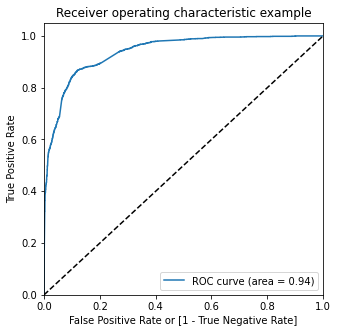

In [93]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

## 6. Finding the Optimal Cutoff Point

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,LeadID,Converted,Conversion_Prob,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5756,0,0.004605,0,1,0,0,0,0,0,0,0,0,0
1,282,0,0.000273,0,1,0,0,0,0,0,0,0,0,0
2,3329,1,0.876245,1,1,1,1,1,1,1,1,1,1,0
3,7135,0,0.220944,0,1,1,1,0,0,0,0,0,0,0
4,4397,1,0.388876,0,1,1,1,1,0,0,0,0,0,0


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
# from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,Sensitivity,specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.360667     1.000000     0.000000
0.1          0.1  0.750174     0.973988     0.623913
0.2          0.2  0.796560     0.946532     0.711957
0.3          0.3  0.864663     0.877649     0.857337
0.4          0.4  0.876303     0.852601     0.889674
0.5          0.5  0.877867     0.826108     0.907065
0.6          0.6  0.872828     0.766859     0.932609
0.7          0.7  0.843989     0.631021     0.964130
0.8          0.8  0.829222     0.558285     0.982065
0.9          0.9  0.794302     0.445568     0.991033


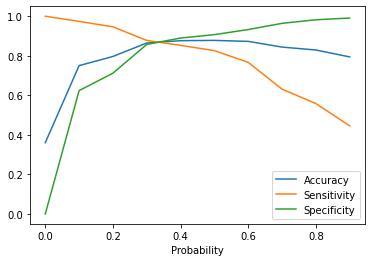

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

> From the curve above, 0.4 is the optimum point to take it as a cutoff/threshold

In [97]:
y_train_pred_final['Converted_Pred'] = y_train_pred_final['Conversion_Prob'].map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,LeadID,Converted,Conversion_Prob,Converted_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5756,0,0.004605,0,1,0,0,0,0,0,0,0,0,0
1,282,0,0.000273,0,1,0,0,0,0,0,0,0,0,0
2,3329,1,0.876245,1,1,1,1,1,1,1,1,1,1,0
3,7135,0,0.220944,0,1,1,1,0,0,0,0,0,0,0
4,4397,1,0.388876,0,1,1,1,1,0,0,0,0,0,0


In [98]:
# Let's re-check the accuracy

metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred'])

0.8763029881862404

In [99]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred'])
print(confusion2)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

[[3274  406]
 [ 306 1770]]


In [100]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8526011560693642

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.8896739130434783

In [102]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.11032608695652174

In [103]:
# Positive predictive value 
TP / float(TP+FP)

0.8134191176470589

In [104]:
# Negative predictive value
TN / float(TN+ FN)

0.9145251396648044

In [105]:
# Prcision and Recall

from sklearn.metrics import precision_score, recall_score

print('Precision:')
print(precision_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred']))
print()
print('Recall:')
print(recall_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Pred']))

Precision:
0.8134191176470589

Recall:
0.8526011560693642


## 7. Precision and Recall Tradeoff

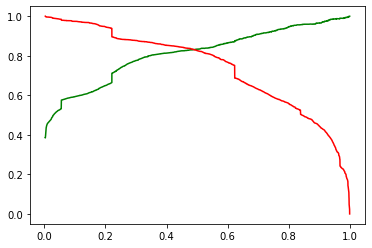

In [106]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 8. Making predictions on the test set

In [107]:
X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_in touch with EINS
336,0.286912,0.37500,0,0,0,0,0,0,0,0,0,0,0,0
439,0.396518,0.31250,0,0,1,0,0,0,0,0,0,0,0,0
5360,0.250161,0.25000,0,0,0,0,1,0,0,0,0,0,0,0
8038,0.464861,0.18750,0,0,0,1,0,0,0,1,0,0,0,0
8017,0.101870,0.16625,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred_final = get_pred_df(y_test, y_test_pred, 0.4)
y_test_pred_final.head()

,LeadID,Converted,Conversion_Prob,Converted_Pred
0,336,0,0.007325,0
1,439,0,0.000957,0
2,5360,0,0.043296,0
3,8038,1,0.938554,1
4,8017,0,0.005312,0


In [109]:
y_test_pred_final['Lead_Score'] = y_test_pred_final['Conversion_Prob'].apply( lambda x: round(x*100))
y_test_pred_final.head()

,LeadID,Converted,Conversion_Prob,Converted_Pred,Lead_Score
0,336,0,0.007325,0,1
1,439,0,0.000957,0,0
2,5360,0,0.043296,0,4
3,8038,1,0.938554,1,94
4,8017,0,0.005312,0,1


In [110]:
# Let's check overall accuracy
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Converted_Pred'])

0.882853668423186

In [111]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Converted_Pred'])
print(confusion_test)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

[[1425  168]
 [ 121  753]]


In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8526011560693642

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.8896739130434783

In [114]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.11032608695652174

In [115]:
# Positive predictive value 
TP / float(TP+FP)

0.8134191176470589

In [116]:
# Negative predictive value
TN / float(TN+ FN)

0.9145251396648044

In [124]:
top_3 = RFE(log_reg, n_features_to_select=3)
top_3 = rfe.fit(X_train[rfe_col], y_train)
list(zip(X_train[rfe_col].columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Graduation in progress', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_in touch with EINS', True, 1)]